In [10]:
import os
import pandas as pd
import numpy as np
import time
# #建立单个文件的excel转换成csv函数,file 是excel文件名，to_file 是csv文件名。
# def excel_to_csv(file,to_file):
#     data_xls=pd.read_excel(file)
#     data_xls.to_csv(to_file,encoding='utf_8_sig',index= False)
 
# #读取一个目录里面的所有文件：
# def read_path(path):
#     dirs=os.listdir(path)
#     return dirs
 
# #主函数
# def main():
#     #源文件路径
#     source= os.path.dirname('./iec.ipynb')
 
#     #目标文件路径
#     ob= 'result'
 
#     #将源文件路径里面的文件转换成列表file_list
#     file_list=[source+'\\'+i for i in read_path(source)]
#     #print(file_list)
#     if not os.path.exists(ob): 
#         os.mkdir(ob)
#     #建立循环对于每个文件调用excel_to_csv()
#         for it in file_list:
#             if it[-5:] == '.xlsx':
#                 #给目标文件新建一些名字列表
#                 a = (it[len(source):-5])  #14为source长度，5为.xlsx长度
#                 j_csv=ob+'\\'+a+".csv"
#                 excel_to_csv(it,j_csv)
#                 #print(it)
#     else:
#         print('该文件夹已存在')
 
# if __name__ == '__main__':
#     main()

In [11]:
_DIRNAME=os.path.dirname(os.path.realpath('__file__'))
print(_DIRNAME)
file = os.listdir('./result')
list=[]
for f in file:
    the_path = _DIRNAME+'\\'+'result'+'\\'+f
    list.append(the_path)
print(list)
    
    

D:\功率计资料\PTC夹发棒
['D:\\功率计资料\\PTC夹发棒\\result\\Book1.csv', 'D:\\功率计资料\\PTC夹发棒\\result\\Book2.csv', 'D:\\功率计资料\\PTC夹发棒\\result\\pic.png', 'D:\\功率计资料\\PTC夹发棒\\result\\pic1.png', 'D:\\功率计资料\\PTC夹发棒\\result\\处理结果.csv']


In [12]:
df =pd.read_csv(list[0],encoding='utf-8-sig')
df


,测量电压值（采集30分钟，每秒钟记录50次）,测量电流值（采集30分钟，每秒钟记录50次）,测量功率值（采集30分钟，每秒钟记录50次）
0,226.86,0.026364,4.6141
1,226.90,0.026284,4.6348
2,226.81,0.026267,4.6094
3,226.82,0.026232,4.5993
4,226.79,0.026388,4.6420
...,...,...,...
89995,225.65,0.025936,4.5246
89996,225.59,0.026001,4.5606
89997,225.63,0.025953,4.5377
89998,225.62,0.025900,4.5208


In [13]:
mean = df.mean()
mean

测量电压值（采集30分钟，每秒钟记录50次）    226.137341
测量电流值（采集30分钟，每秒钟记录50次）      0.026100
测量功率值（采集30分钟，每秒钟记录50次）      4.572051
dtype: float64

In [14]:
max = df.max()
max

测量电压值（采集30分钟，每秒钟记录50次）    227.410000
测量电流值（采集30分钟，每秒钟记录50次）      0.026662
测量功率值（采集30分钟，每秒钟记录50次）      4.705000
dtype: float64

In [15]:
compare = max>2*mean
compare

测量电压值（采集30分钟，每秒钟记录50次）    False
测量电流值（采集30分钟，每秒钟记录50次）    False
测量功率值（采集30分钟，每秒钟记录50次）    False
dtype: bool

In [16]:
# columns = ['测量电压值（采集30分钟，每秒钟记录50次）','测量电流值（采集30分钟，每秒钟记录50次）','测量功率值（采集30分钟，每秒钟记录50次）','电压运算值','电流运算值','功率运算值']
# df.reindex(columns)
def decision(meas,operation):
    if compare[meas] == False:
        sorted_df1 = df.sort_values(meas,ascending=False).reset_index(drop=True)
        sorted_df1.index = sorted_df1.index+1
        index_10pct = int((sorted_df1.index.tolist()[-1])*0.1)
        value_10pct = sorted_df1.loc[index_10pct,meas]
        print(operation+'='+str(round(mean[meas],3)))

    else:
        sorted_df1 = df.sort_values(meas,ascending=False).reset_index(drop=True)
        sorted_df1.index = sorted_df1.index+1
        index_10pct = int((sorted_df1.index.tolist()[-1])*0.1)
        value_10pct = sorted_df1.loc[index_10pct,meas]
        if value_10pct > mean[meas]:
            print(operation+'='+str(round(value_10pct,3)))
        else:
            print(operation+'='+str(round(mean[meas],3)))
    return sorted_df1,value_10pct
sorted_df = decision('测量电压值（采集30分钟，每秒钟记录50次）','电压运算值')
sorted_df[0]
#df.to_csv('./result/test.csv',encoding='utf-8-sig')

电压运算值=226.137


,测量电压值（采集30分钟，每秒钟记录50次）,测量电流值（采集30分钟，每秒钟记录50次）,测量功率值（采集30分钟，每秒钟记录50次）
1,227.41,0.026343,4.6453
2,227.40,0.026397,4.6393
3,227.39,0.026412,4.6301
4,227.39,0.026330,4.6139
5,227.39,0.026323,4.6232
...,...,...,...
89996,223.79,0.025449,4.4429
89997,223.79,0.025567,4.4504
89998,223.79,0.025592,4.4713
89999,223.78,0.025529,4.4461


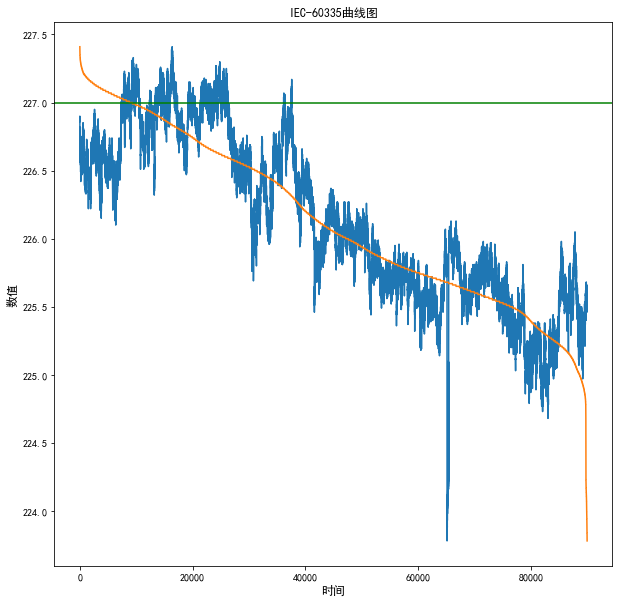

In [17]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.rcParams['font.family']=['SimHei']
x=np.arange(1,90001,1)
y= df['测量电压值（采集30分钟，每秒钟记录50次）']
y_sorted = sorted_df[0]['测量电压值（采集30分钟，每秒钟记录50次）']
# plt.scatter(x,y)
# plt.scatter(x,y_sorted)
plt.plot(x,y)
plt.plot(x,y_sorted)
plt.axhline(y=sorted_df[1],color='g')
plt.title('IEC-60335曲线图')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('时间',fontsize=12)
plt.ylabel('数值',fontsize=12)
# if os.path.exists('./result/pic.png') == True:
#     pass
# else:
plt.savefig('./result/pic.png')


In [18]:

sorted_df[0].to_csv('./result/处理结果.csv',encoding='utf-8-sig',index=False)